# Proplem Statement
The "complete_data.xlsx' contain different attribute for each plant and its corresponding yield data. You have been tasked to explore the data and determine whether there is any way that yield can be predicted. Hint: Can the area of a plant predict yield?

## Part 1: Import Importnat Packages

In [1]:
#imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
# allow plots to appear directly in the notebook
%matplotlib inline

## Part 2: Load Data and Identify what variables can predict yield

In [52]:
#Read data form excel into a dataframe 
data = pd.read_excel('516x_Project/Data/Complete_Data.xlsx')

In [75]:
# Replace missing values with 0
data = data.fillna(0)

In [53]:
#Take a look at the available data
list(data.columns)

['Unnamed: 0',
 'Unnamed: 0_x',
 'OBJECTID',
 'Join_Count',
 'TARGET_FID',
 'Join_Count_1',
 'TARGET_FID_1',
 'Shape_Leng',
 'Master_ID',
 'Plot_Numbe',
 'Row_Number',
 'Zone_Numbe',
 'Plant_Numb',
 'Descriptio',
 'Shape_Le_1',
 'Duplicate',
 'FID_1',
 'Row',
 'Rep_Num',
 'Notable',
 'First_Dist',
 'Last_Dist',
 'Prev_Dist',
 'Next_Dist',
 'SNext_Dist',
 'SNext_ID',
 'SPrev_Dist',
 'SPrev_ID',
 'DNext_Dist',
 'DNext_ID',
 'DPrev_Dist',
 'DPrev_ID',
 'Day1Detct',
 'Day1Area',
 'Emerge',
 'Day1Angle',
 'Day1Diam',
 'Day1Leaf',
 'Day2Detct',
 'Day2Area',
 'Day2Angle',
 'Day2Diam',
 'Day2Leaf',
 'Day3Detct',
 'Day3Area',
 'Day3Angle',
 'Day3Diam',
 'Day3Leaf',
 'Day4Detct',
 'Day4Area',
 'Day4Angle',
 'Day4Diam',
 'Day4Leaf',
 'Day5Detct',
 'Day5Area',
 'Day5Angle',
 'Day5Diam',
 'Day5Leaf',
 'Day6Detct',
 'Day6Area',
 'Day6Angle',
 'Day6Diam',
 'Day6Leaf',
 'Day9Detct',
 'Day9Area',
 'Day9Angle',
 'Day9Diam',
 'Day9Leaf',
 'Day13Detct',
 'Day13Area',
 'Day18Detct',
 'Day18Area',
 'Note',


One hypothesis is that the larger the plant, the more yield can produce. We are going to investigate that idea.  

# Part 3: Visualized the data 

In [89]:
#Extract all columns that contain area data
names = list(data.columns)
area_name = [s for s in names if "Area" in s]

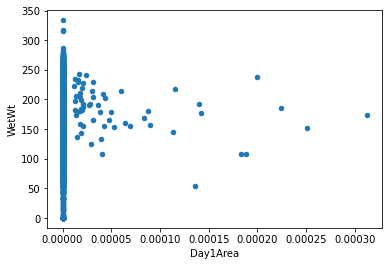

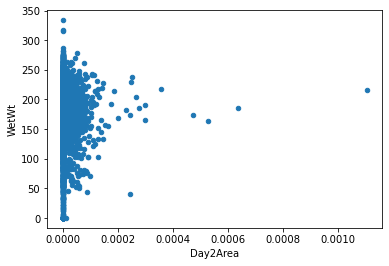

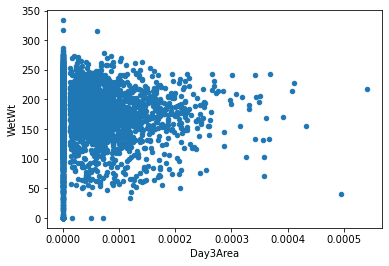

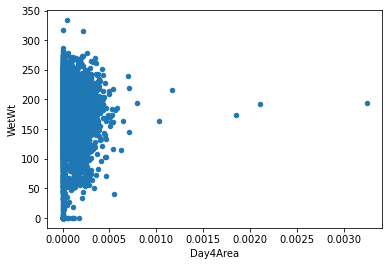

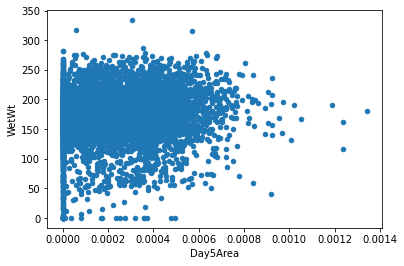

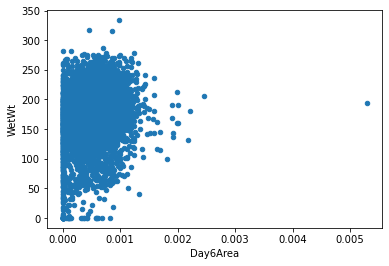

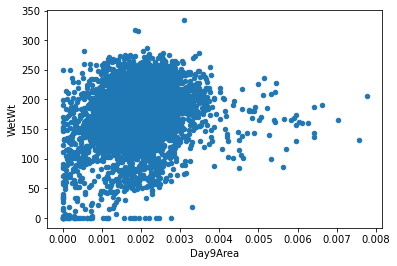

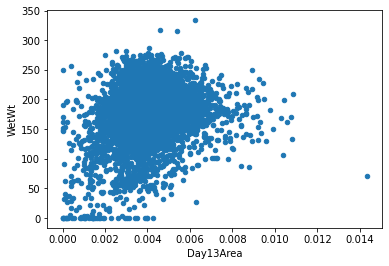

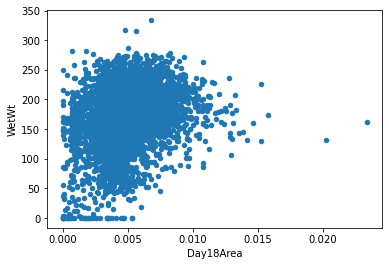

In [90]:
for i in range(len(area_name)):
    data.plot.scatter( x = area_name[i],
                       y = 'WetWt')

None of these plots show a clear pattern, but we will move forward and see how good or bad a linear regression can fit this data.   

## Part 4: Create the arrays for x (inputs) and y (outputs) 
* x: what you used to predict yield
* y: yield

In [62]:
#Extract all columns that contain area data
names = list(data.columns)
area_name = [s for s in names if "Area" in s]

In [76]:
#Create Array of areas
Day1Area = data["Day1Area"]
area1 = Day1Area[:, np.newaxis]

Day2Area = data["Day2Area"]
area2 = Day2Area[:, np.newaxis]

Day3Area = data["Day3Area"]
area3 = Day3Area[:, np.newaxis]

Day4Area = data["Day4Area"]
area4 = Day4Area[:, np.newaxis]

Day5Area = data["Day5Area"]
area5 = Day5Area[:, np.newaxis]

Day6Area = data["Day6Area"]
area6 = Day6Area[:, np.newaxis]

Day9Area = data["Day9Area"]
area9 = Day9Area[:, np.newaxis]

Day13Area = data["Day13Area"]
area13 = Day13Area[:, np.newaxis]

Day18Area = data["Day18Area"]
area18 = Day18Area[:, np.newaxis]



<ipython-input-76-83c00992aec7>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  area1 = Day1Area[:, np.newaxis]
<ipython-input-76-83c00992aec7>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  area2 = Day2Area[:, np.newaxis]
<ipython-input-76-83c00992aec7>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  area3 = Day3Area[:, np.newaxis]
<ipython-input-76-83c00992aec7>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  area4 = Day4Area[:, np.newa

In [77]:
# Y data 
yield_data = data['WetWt']

In [78]:
area1.shape

(5337, 1)

In [79]:
yield_data.shape

(5337,)

## Part 5: Generate and Fit Regressions

In [87]:
mod = smf.ols(formula='yield_data ~ area1 + area2 + area3 + area4 + area5 + area6 + area9 + area13 + area18',
              data=data).fit()
mod.params

Intercept       132.857281
area1       -111961.925067
area2         57708.406699
area3        -94355.122978
area4         -7698.885849
area5        -16908.963608
area6         28601.065263
area9          2599.697099
area13         2920.659026
area18         3287.245623
dtype: float64

In [88]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             yield_data   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     68.12
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          2.91e-119
Time:                        00:01:20   Log-Likelihood:                -27685.
No. Observations:                5337   AIC:                         5.539e+04
Df Residuals:                    5327   BIC:                         5.546e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.8573      2.034     65.309      0.0

From this summary, it looks liek none of the areas can be clearly correlated to yield since all the std error are very high. We are going to take a closer look at area 18 since it has the lowest std err.

In [94]:
area18_model = smf.ols(formula='yield_data ~ area18', data=data).fit()
print(area18_model.summary())

                            OLS Regression Results                            
Dep. Variable:             yield_data   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     415.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.49e-89
Time:                        00:15:37   Log-Likelihood:                -27775.
No. Observations:                5337   AIC:                         5.555e+04
Df Residuals:                    5335   BIC:                         5.557e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    143.5680      1.619     88.668      0.0

Only, 7.2% of the data can be decribe using the area of day 18. Now we are going to visualize this results.

In [92]:
area18_prediction=area18_model.predict()

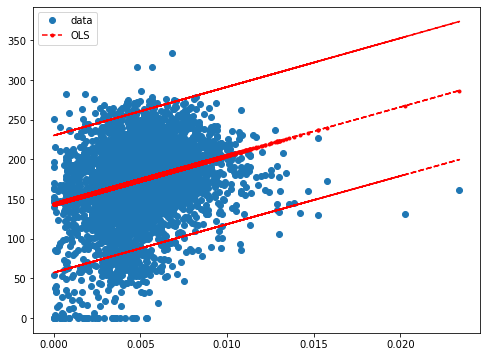

In [95]:
pred_ols = area18_model.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(area18, yield_data, "o", label="data")
ax.plot(area18, area18_model.fittedvalues, "r--.", label="OLS")
ax.plot(area18, iv_u, "r--")
ax.plot(area18, iv_l, "r--")
ax.legend(loc="best")

## Conclusion
None of the areas can accurately predict the yield. A multi-variable analysis can be considered, but there is no apparent pattern for now. 